Перед нами данные с информацией о 100 популярных женских именах, которые были присвоены детям при государственной регистрации рождения в Москве с 2015 по 2021 год с разбивкой по месяцам.

В России нет единой статистики имен среди новорожденных детей.
Статистика по именам среди новорожденных не является обязательной для органов ЗАГС и формируется некоторыми регионами в качестве познавательно-развлекательной.

Именно таким и будет исследование, которое опирается на [американское исследование](https://www.chartr.co/stories/2022-11-21-3-fewer-babies-being-called-alexa) динамики популярности имени Алекса в зависимости от увеличения количество устройств голосового помощника Alexa от Amazon. Сначала число новорожденных Алекса резко возросло после запуска голосового помощника в конце 2014 года — возможно, родители услышали это имя в новостях и оно им понравилось, но в последствии популяность резко уменьшилась. Вероятно, родители начали понимать, что имя может ассоциироваться с подчинением, потому что люди всегда отдают приказы своим виртуальным Алексам.

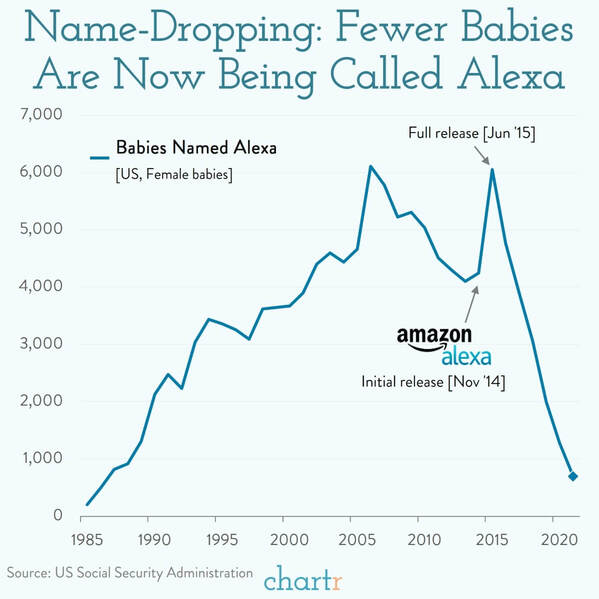

In [29]:
from IPython.display import Image 
Image('photo_Alexa.jpg')

Имеется предположение о том, что и в России с увеличением продаж виртуального ассистента Яндекс.Станции "Алиса" популярность женского имени Алиса среди новорожденных уменьшится. Первые продажи умной колонки "Алисы" начались в середине 2018 года, а уже в 2020 году появился первый рекорд - было продано 1,3 млн устройств. 
    
Нас интересуют следующие данные из таблицы:
* name - имя новорожденной девочки
* number_of_persons - количество новорожденных в месяц
* year - год 

In [30]:
import pandas as pd
import chardet
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import preprocessing

In [55]:
with open('data-names.csv', 'rb') as f: #открываем файл в бинарном режиме только для чтения
    result = chardet.detect(f.read()) #используем функцию detect для автоматического распознавания кодировок символов в тексте
data = pd.read_csv('data-names.csv',  sep=';', encoding=result['encoding']) #читаем файл с автоматически обнаруженной кодировкой
data

,ID,Name,NumberOfPersons,global_id,Year,Month,ID_en,Name_en,NumberOfPersons_en,Year_en,Month_en,Unnamed: 11
0,Код,Имя,Количество человек,global_id,Год,Месяц,ID_en,Name_en,NumberOfPersons_en,Year_en,Month_en,NaN
1,1,Мария,252,37750254,2015,январь,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Анастасия,224,37750255,2015,январь,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Анна,190,37750256,2015,январь,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Варвара,190,37750257,2015,январь,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9196,10296,Карина,9,2386772585,2022,Август,NaN,NaN,NaN,NaN,NaN,NaN
9197,10297,Медина,9,2386772586,2022,Август,NaN,NaN,NaN,NaN,NaN,NaN
9198,10298,Сумая,9,2386772587,2022,Август,NaN,NaN,NaN,NaN,NaN,NaN
9199,10299,Самира,9,2386772588,2022,Август,NaN,NaN,NaN,NaN,NaN,NaN


Преобразуем данные: убираем лишние колонки, строки, переименовываем названия колонок, изменям тип данных

In [56]:
#удаляем первую строку
data.drop(index=data.index [0], axis= 0 , inplace= True) 

In [57]:
#приводим названия столбцов в более удобный и читаемый вид
def lower_underscore(name):
    name=name.lower()
    return name
data = data[['Name', 'NumberOfPersons', 'Year']]\
.rename(columns=lower_underscore)\
.rename(columns={'numberofpersons':'number_of_persons'})
data

,name,number_of_persons,year
1,Мария,252,2015
2,Анастасия,224,2015
3,Анна,190,2015
4,Варвара,190,2015
5,Виктория,186,2015
...,...,...,...
9196,Карина,9,2022
9197,Медина,9,2022
9198,Сумая,9,2022
9199,Самира,9,2022


In [58]:
#смотрим на типы данных
data.dtypes

name                 object
number_of_persons    object
year                 object
dtype: object

In [59]:
#в следующих операциях будет производиться суммирование столбца number_of_persons, переводим его в числовой тип
data.number_of_persons = pd.to_numeric(data.number_of_persons)

In [60]:
#проверяем тип данных 
data.dtypes

name                 object
number_of_persons     int64
year                 object
dtype: object

Отберем всех новорожденных детей по имени Алиса с 2015 по 2021 год

In [68]:
data_Alice = data.query('name=="Алиса"')\
.groupby('year')\
.agg({'number_of_persons':'sum'})
data_Alice = data_Alice.iloc[0:7] #берем данные без 2022 года, так как имеются данные только за первую половину 2022 г.
data_Alice

,number_of_persons
year,
2015,2144
2016,2253
2017,2199
2018,2140
2019,2157
2020,1726
2021,1871


На первый взгляд прослеживается снижение популярности имени Алиса к 2020 году обратно пропорционально росту продаж умной колонки "Алисы", как и в данных от США. Но в американских данных не учитывалась динамика рождаемости детей, может быть такое, что пополярность имени снизилась вместе со снижением рождаемости. Поэтому посмотрим на динамику рождаемости в Москве

In [69]:
data_names = data.groupby('year')\
.agg({'number_of_persons':'sum'})
data_names = data_names.iloc[0:7] #берем данные без 2022 года, так как имеются данные только за первую половину 2022 г.
data_names

,number_of_persons
year,
2015,59672
2016,60471
2017,55153
2018,53756
2019,54791
2020,47484
2021,48976


Чтобы можно было сравнивать и нанести на график данные о популярности имени Алиса и данные о рождаемости, нужно нормализовать эти данные. Приведем данные к единому масштабу от -1 до 1.

In [70]:
#объединим нужные данные в 1 таблицу для дальнейшего масштабирования
all_data = data_names.merge(data_Alice, on='year')
all_data 

,number_of_persons_x,number_of_persons_y
year,,
2015,59672,2144
2016,60471,2253
2017,55153,2199
2018,53756,2140
2019,54791,2157
2020,47484,1726
2021,48976,1871


In [71]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(all_data)
all_data_scaling = pd.DataFrame(np_scaled)

In [72]:
#при масштабировании слетают названия колонок, можно их переименовать обратно
all_data_scaling.rename(columns={0:'number_newborn', 1: 'number_Alice'}, inplace=True)

In [73]:
all_data_scaling ['year'] = [2015,2016,2017,2018,2019,2020,2021]
all_data_scaling

,number_newborn,number_Alice,year
0,0.938477,0.793169,2015
1,1.000000,1.000000,2016
2,0.590514,0.897533,2017
3,0.482944,0.785579,2018
4,0.562640,0.817837,2019
5,0.000000,0.000000,2020
6,0.114884,0.275142,2021


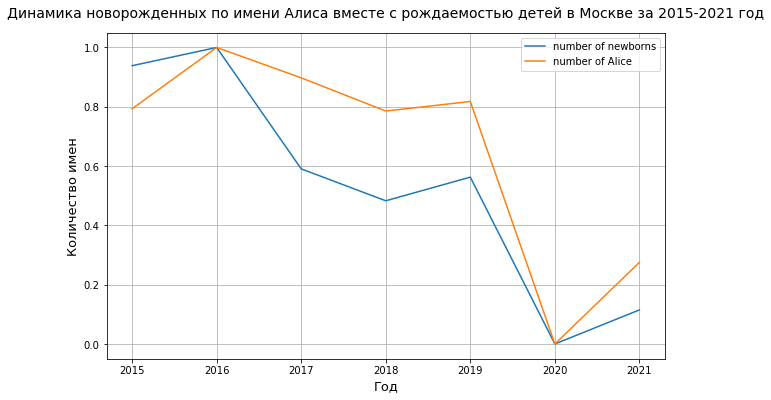

In [75]:
plt.figure(figsize=(10,6))
sns.lineplot(data = all_data_scaling, x = 'year', y = 'number_newborn', label = 'number of newborns')
sns.lineplot(data = all_data_scaling, x = 'year',  y = 'number_Alice', label = 'number of Alice')
plt.xlabel('Год', fontsize=13)
plt.ylabel('Количество имен', fontsize=13)
plt.title('Динамика новорожденных по имени Алиса вместе с рождаемостью детей в Москве за 2015-2021 год', 
          fontsize=14,  
          pad='15')
plt.legend()
plt.grid(True)
plt.show()

По данному графику можно увидеть, что в основном динамика количества названных детей именем Алиса сходится с динамикой количества рожденных детей. Однако в 2020 году в сравнении со спадом количества новорожденных прослеживается более резкий спад детей, названных именем Алиса. Это позволяет сделать вывод о том, что в 2020 году популярность имени Алиса несколько снизилась вследствие первого рекорда продаж виртуального ассистента Яндекс.Станции "Алиса". 

Но уже в следующем году женское имя Алиса начинает набирать популярность, поэтому на основе данного исследования, делаем вывод что в Москве нет тенденции на ежегодное снижение популярности имени Алиса, как это просдеживается в США с Alexa от Amazon.